In [1]:
import sys
sys.path.append(sys.path[0].replace('/Development Notebooks',''))
from group_decomposition import fragfunctions as ff
from group_decomposition.utils import mol_from_molfile, set_scaffold_params, get_scaffold_vertices, find_smallest_rings, xyz_from_cml
import rdkit
from rdkit import Chem, rdBase
from rdkit.Chem import BRICS
from rdkit.Chem import AllChem #used for 3d coordinates
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Scaffolds import rdScaffoldNetwork # scaffolding
from rdkit import RDPaths
from rdkit.Chem.Draw import rdMolDraw2D
import numpy as np

In [2]:
frag_frame = ff.identify_connected_fragments('mol.txt',input_type='molfile',cml_file='cml.txt')
mol = Chem.MolFromMolFile('mol.txt')

[14:41:38] Running LargestFragmentChooser
[14:41:38] Fragment: [C:1]([C@:2]1([N:3]([C:4](=[N:5][H:18])[H:17])[H:16])[C@:6]([N:7]([H:20])[H:21])([H:19])[C:8]([H:22])([H:23])[C@:9]1([N:10]1[C:11]([H:25])([H:26])[C:12]1([H:27])[H:28])[H:24])([H:13])([H:14])[H:15]
[14:41:38] New largest fragment: [C:1]([C@:2]1([N:3]([C:4](=[N:5][H:18])[H:17])[H:16])[C@:6]([N:7]([H:20])[H:21])([H:19])[C:8]([H:22])([H:23])[C@:9]1([N:10]1[C:11]([H:25])([H:26])[C:12]1([H:27])[H:28])[H:24])([H:13])([H:14])[H:15] (28)


[14:41:38] Running LargestFragmentChooser
[14:41:38] Fragment: [C:1]([C@:2]1([N:3]([C:4](=[N:5][H:18])[H:17])[H:16])[C@:6]([N:7]([H:20])[H:21])([H:19])[C:8]([H:22])([H:23])[C@:9]1([N:10]1[C:11]([H:25])([H:26])[C:12]1([H:27])[H:28])[H:24])([H:13])([H:14])[H:15]
[14:41:38] New largest fragment: [C:1]([C@:2]1([N:3]([C:4](=[N:5][H:18])[H:17])[H:16])[C@:6]([N:7]([H:20])[H:21])([H:19])[C:8]([H:22])([H:23])[C@:9]1([N:10]1[C:11]([H:25])([H:26])[C:12]1([H:27])[H:28])[H:24])([H:13])([H:14])[H:15] (28)


,Smiles,Molecule,numAttachments,Atoms,xyz,Labels
0,[1*][C@@]1([2*])[C@H]([4*])C[C@@H]1[3*],,4,"[2, 6, 8, 9, 19, 22, 23, 24]","[[-0.3923738854, 0.0967594812, -0.1272617014],...","[C, C, C, C, H, H, H, H]"
1,[2*]NC=N,,1,"[3, 4, 5, 16, 17, 18]","[[-0.9739272989, 1.2613052532, 0.5309204078], ...","[N, C, N, H, H, H]"
2,[3*]N,,1,"[7, 20, 21]","[[-1.7727338429, -2.0346443043, -0.4117740679]...","[N, H, H]"
3,[4*]N1CC1,,1,"[10, 11, 12, 25, 26, 27, 28]","[[2.1614951848, 0.0987681757, -0.3856958646], ...","[N, C, C, H, H, H, H]"
4,[1*]C,,1,"[1, 13, 14, 15]","[[-0.4535358949, 0.2234540606, -1.6469131302],...","[C, H, H, H]"

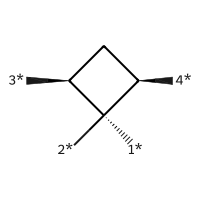
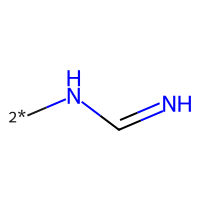
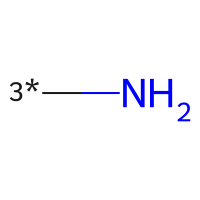
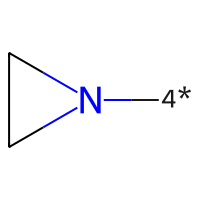
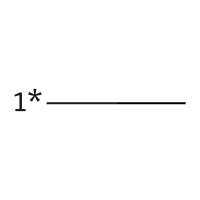

In [3]:
ff.identify_connected_fragments('mol.txt',input_type='molfile',cml_file='cml.txt')

In [4]:
unique_frame = ff.count_uniques(frag_frame)

In [5]:
ff.output_ifc_gjf(mol,  unique_frame)

,Smiles,xyz,Molecule,count,numAttachments,Atoms,Labels,H_xyz,at_idx
1,*NC=N,"[[-0.9739272989, 1.2613052532, 0.5309204078], ...",<rdkit.Chem.rdchem.Mol object at 0x14a6e7ed0>,1,1,"[3, 4, 5, 16, 17, 18]","[N, H, C, N, H, H, H]","[-0.5744764694252525, 0.46141522798787876, 0.0...",0
2,*N,"[[-1.7727338429, -2.0346443043, -0.4117740679]...",<rdkit.Chem.rdchem.Mol object at 0x14a6e7a70>,1,1,"[7, 20, 21]","[N, H, H, H]","[-1.1488715281565656, -1.5156994744010102, 0.1...",0
3,*N1CC1,"[[2.1614951848, 0.0987681757, -0.3856958646], ...",<rdkit.Chem.rdchem.Mol object at 0x14a6e7df0>,1,1,"[10, 11, 12, 25, 26, 27, 28]","[N, H, C, C, H, H, H, H]","[1.364426704830303, -0.1493379737212121, 0.172...",0
4,*C,"[[-0.4535358949, 0.2234540606, -1.6469131302],...",<rdkit.Chem.rdchem.Mol object at 0x14a6e6500>,1,1,"[1, 13, 14, 15]","[C, H, H, H, H]","[-0.41090782767272727, 0.13515177798787878, -0...",0
